<a href="https://colab.research.google.com/github/Dodaz/AH2179_HT24/blob/main/AH2179_EX4_Algot_Sjoholm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise - Assignment task-Find the best text classification model for the sentimental analysis (assignment submission)

Import dataset

In [3]:
import pandas as pd
import os

# The path of the dataset
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_4_Text_classification/Pakistani%20Traffic%20sentiment%20Analysis.csv'

# Load the data use the pandas
df = pd.read_csv(url)

# Display the data
df.head()

,Text,Sentiment
0,Adayala road is clear,0
1,Traffic jam from parbat rd to nazim-ud-din rd ...,1
2,Mandra is clear,0
3,Fort street is clear,0
4,"Mashriq Hotel towards Fawara Chowk, City Sadda...",1


In [4]:
# Delete the duplicate rows
df = df.drop_duplicates()

# Displaying the instances of each class
df.groupby('Sentiment').describe()

Text                                                               
          count unique                                                top freq
Sentiment                                                                     
0          1008   1008                              Adayala road is clear    1
1          1079   1079  Traffic jam from parbat rd to nazim-ud-din rd ...    1

The tasks for this part is use the grid search to:
1. Identify which vectorization method works the best or basically not much difference.
2. Identify which model, together with its corresponding hyperparameters, gives the best performance for traffic sentimental analysis.

You can either use the structure below or be a be a bit more explorative and try out other strategies we have discussed in the lecture/exercises to find the best parameters/model (e.g., Random Search, ROC curve,...).

{'C': 10, 'kernel': 'rbf'}
The accuracy of the model is: 0.9808917197452229


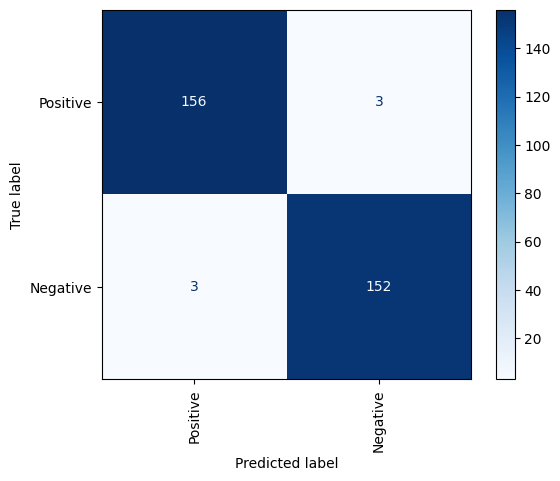

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import os
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*

#(1) CountVectorizer
#vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english',min_df=20)

#(2) #HashingVectorizer
vectorizer = HashingVectorizer(ngram_range=(1, 2), n_features=200)

#(3)TfidfVectorizer
'''vectorizer = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    stop_words='english'
    )'''

#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*

# split into train/test set
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)

# apply the vectorizers
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# here you can try use the grid search to find the best model parameter(a example is in SVM model)
#-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
#(1)LR
'''model = LogisticRegression(max_iter=1000, random_state=0)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}'''

#(2)KNN
'''model=KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}'''

#(3)RF
'''model = RandomForestClassifier(random_state=0)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}'''

#(4)XGBoost
'''model =  XGBClassifier()
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}'''


#(5)SVM
model= SVC(probability=True)

# this is an example to use the grid search to find the best parameter for SVM model
# param_grid specifies the hyperparameter grid to search over： kernel types
# ('linear', 'rbf', 'poly') and regularization strength C values（0.1, 1, 10）.
param_grid = {'kernel': ['linear', 'rbf', 'poly'],'C': [0.1, 1, 10]}

#(6)Naïve Bayes models
#model=BernoulliNB()
#param_grid = {'alpha': [0.1, 0.5, 1],'force_alpha': [True,False]}

#`grid_search` performs a grid search with 5-fold cross-validation and evaluates models based on accuracy.
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

#`fit` method fits the model to the training data, systematically trying out all
# parameter combinations.
grid_search.fit(x_train_vectorized, y_train)

#`best_params` and `best_score` store the best hyperparameters and their
# corresponding accuracy score.
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_

#The `model` is updated with the best estimator found during the grid search,
# which can be used for further analysis.
model = grid_search.best_estimator_

#-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

cmd.from_estimator(
    model,
    x_test_vectorized,
    y_test,
    display_labels=['Positive','Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
    )

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))